In [ ]:
# libraries

from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np


Data size: 3848011
Sample rate: 48000
Song length (seconds): 80.16689583333333 seconds


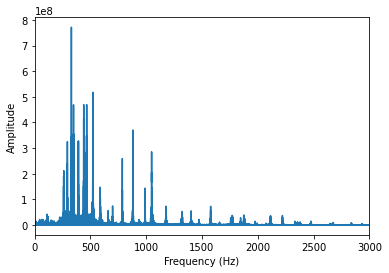

array([  16.  ,   16.02,   16.03, ..., 7999.97, 7999.99, 8000.  ])

In [ ]:
def wav_to_fft(file_path):
  # read in sound file
  samplerate, data = wavfile.read(file_path)

  # define sound metadata
  data_size = data.shape[0]
  song_length_seconds = data_size/samplerate

  # print sound metadata
  print("Data size:", data_size)
  print("Sample rate:", samplerate)
  print("Song length (seconds):", song_length_seconds, "seconds")

  #taking the Transpose of the numpy array
  array = data.T[1]

  t = np.arange(len(array))
  frequencies = np.fft.fftfreq(t.shape[-1])*samplerate
  sp = np.fft.fft(array) 
  music = []

  amplitude = abs(sp.real)

  plt.xlim([0, 3000])
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Amplitude")
  plt.plot(frequencies, amplitude)
  plt.show()

  indexes = np.where((frequencies > 16) & (frequencies < 8000))
  notes_freq = np.round_(frequencies[indexes], 2)

  return notes_freq  

wav_to_fft('/content/hpd.wav')
